# NFL Fantasy Football Feature Engineering

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## QB Fantasy Football Points

https://help.yahoo.com/kb/SLN6489.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAHMz35K_O3L1pszAeKC5jZlFg5WiR9TT8n0XBWXu9tylJDC1abXTEqew28opckbB5CB2drxW9F7pamkgrh4agiIfs9BjKNnWmgFtuyesokfa56aZmvXLtiogFhjjIJYrD2snuPT_ObR59A6MJF8I2HlUlA2Z5BSU_xvaTQW4vTt1

| Stat                  | Points |
|-----------------------|--------|
| Reception             | 0.5    |
| 25 Passing yards      | 1      |
| Passing TD            | 4      |
| Interception thrown   | -1     |
| 10 Rushing yards      | 1      |
| Rushing TD            | 6      |
| 10 Receiving yards    | 1      |
| Receiving TD          | 6      |
| Return TD             | 6      |
| Off Fumble Return TD  | 6      |
| 2-point converstion   | 2      |
| Fumble lost           | -2     |


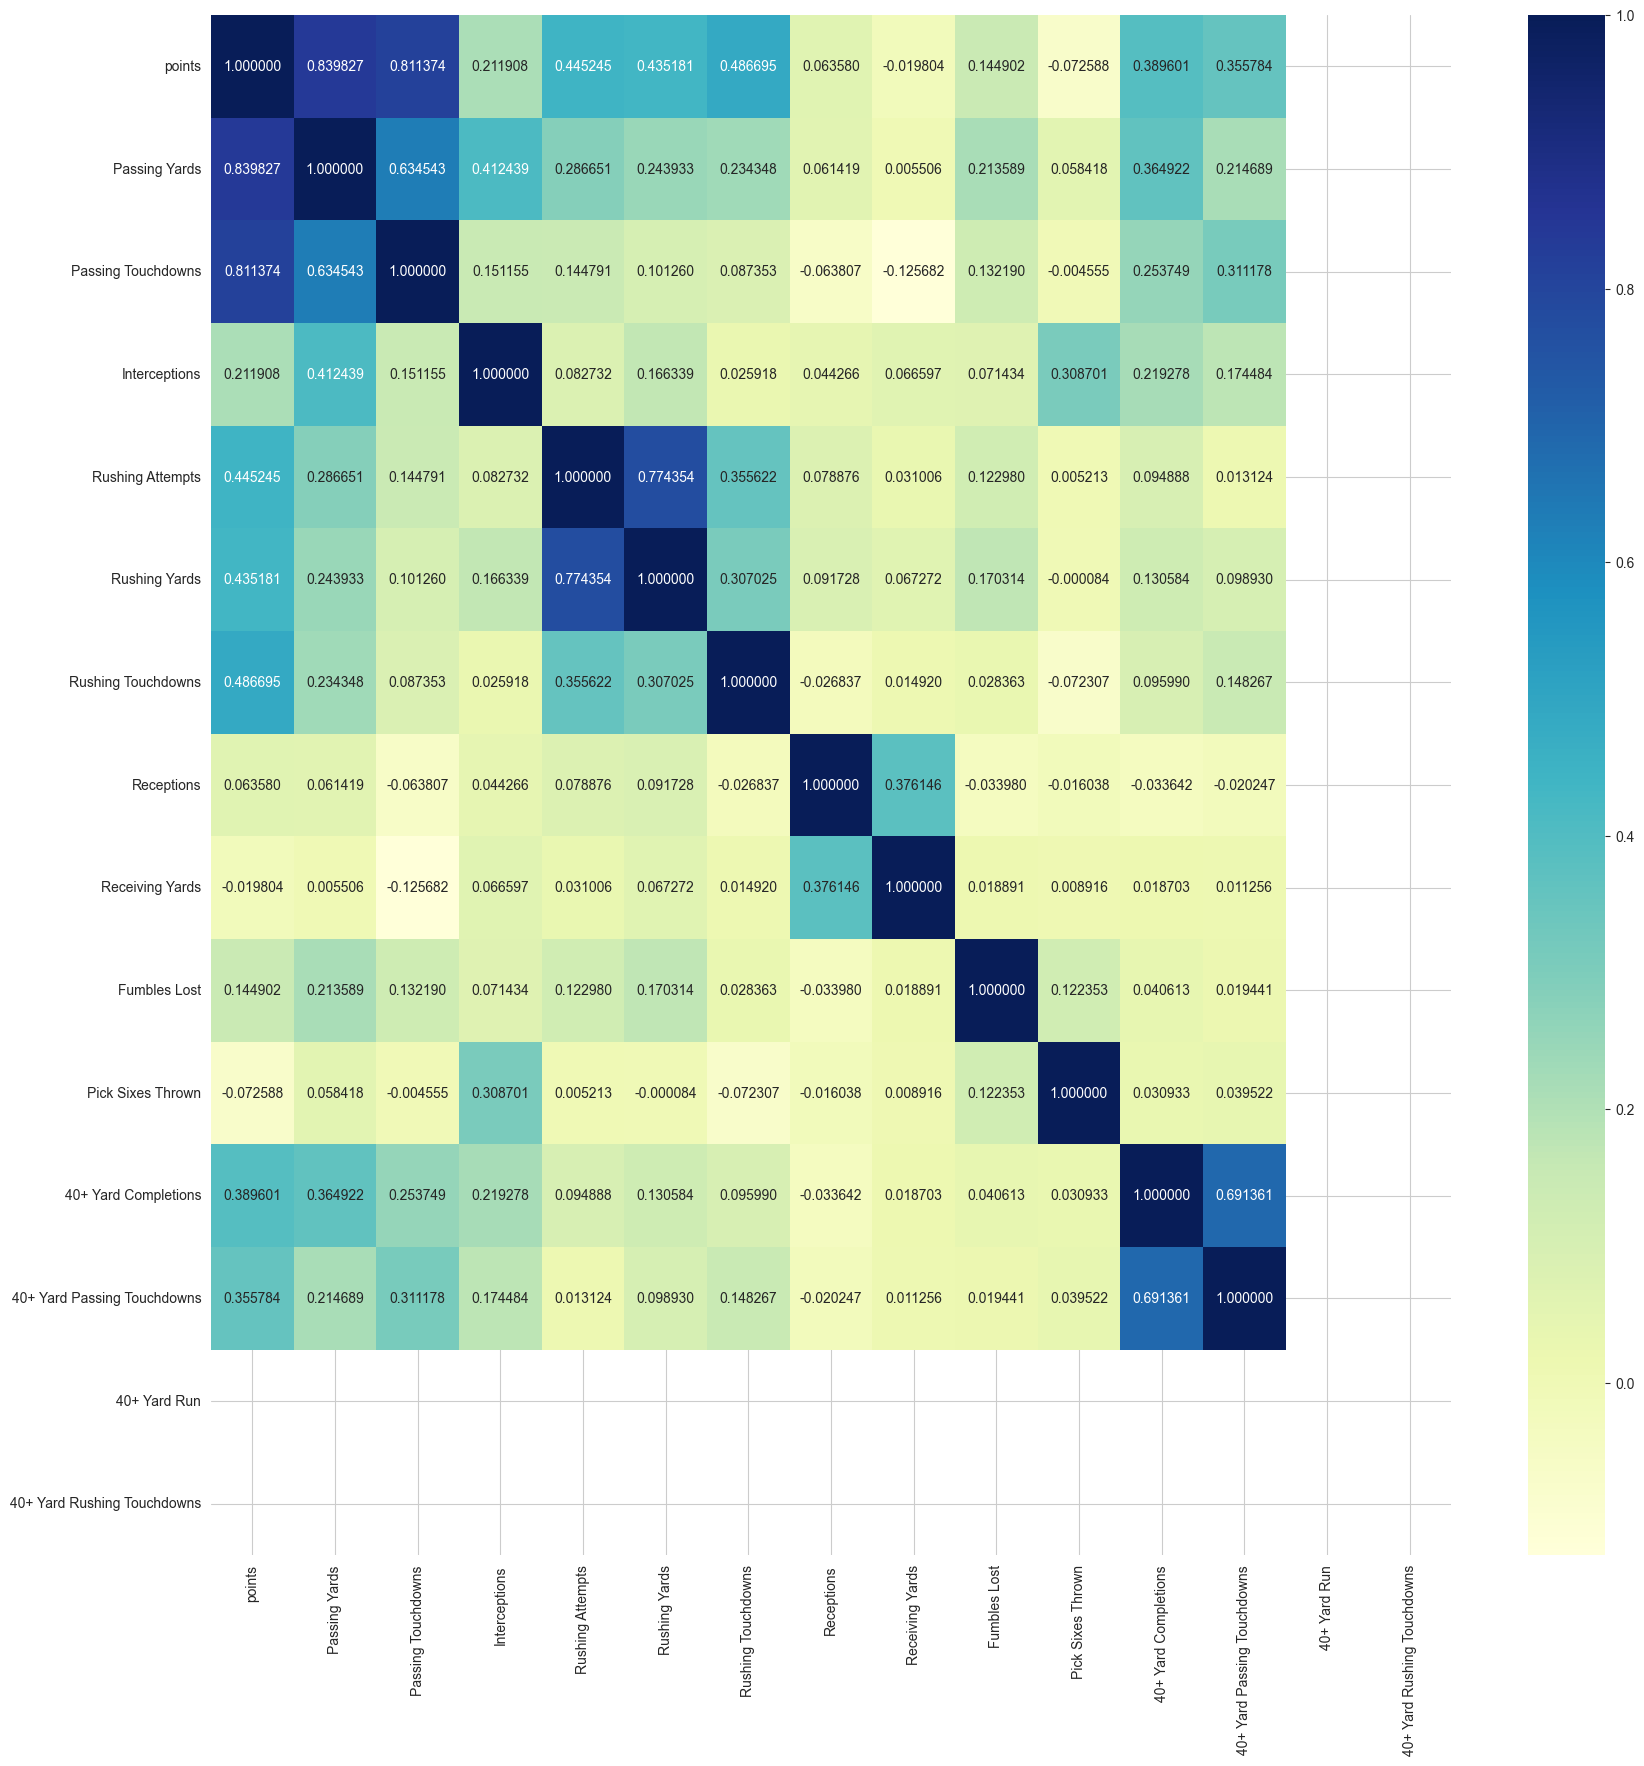

In [91]:
# TODO: Break this out as an ayalsis notebook
#player_stats_general = pd.read_csv('../tmp/01/player_general_stats.csv',  index_col=0)
#player_stats_general

# TODO calculate fantasy points
fpts_df = pd.read_csv('../tmp/01/player_points.csv')

fpts_df = fpts_df.drop(['player_key', 'name'], axis=1)


# Select features a priori
df = fpts_df[[
    'points', 'Passing Yards', 'Passing Touchdowns','Interceptions', 'Rushing Attempts', 'Rushing Yards',
    'Rushing Touchdowns', 'Receptions', 'Receiving Yards', 'Fumbles Lost', 'Pick Sixes Thrown', 
    '40+ Yard Completions', '40+ Yard Passing Touchdowns', '40+ Yard Run','40+ Yard Rushing Touchdowns'
]]

plt.figure(figsize=(20, 20))
p1 = seaborn.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt="f")
plt.show()

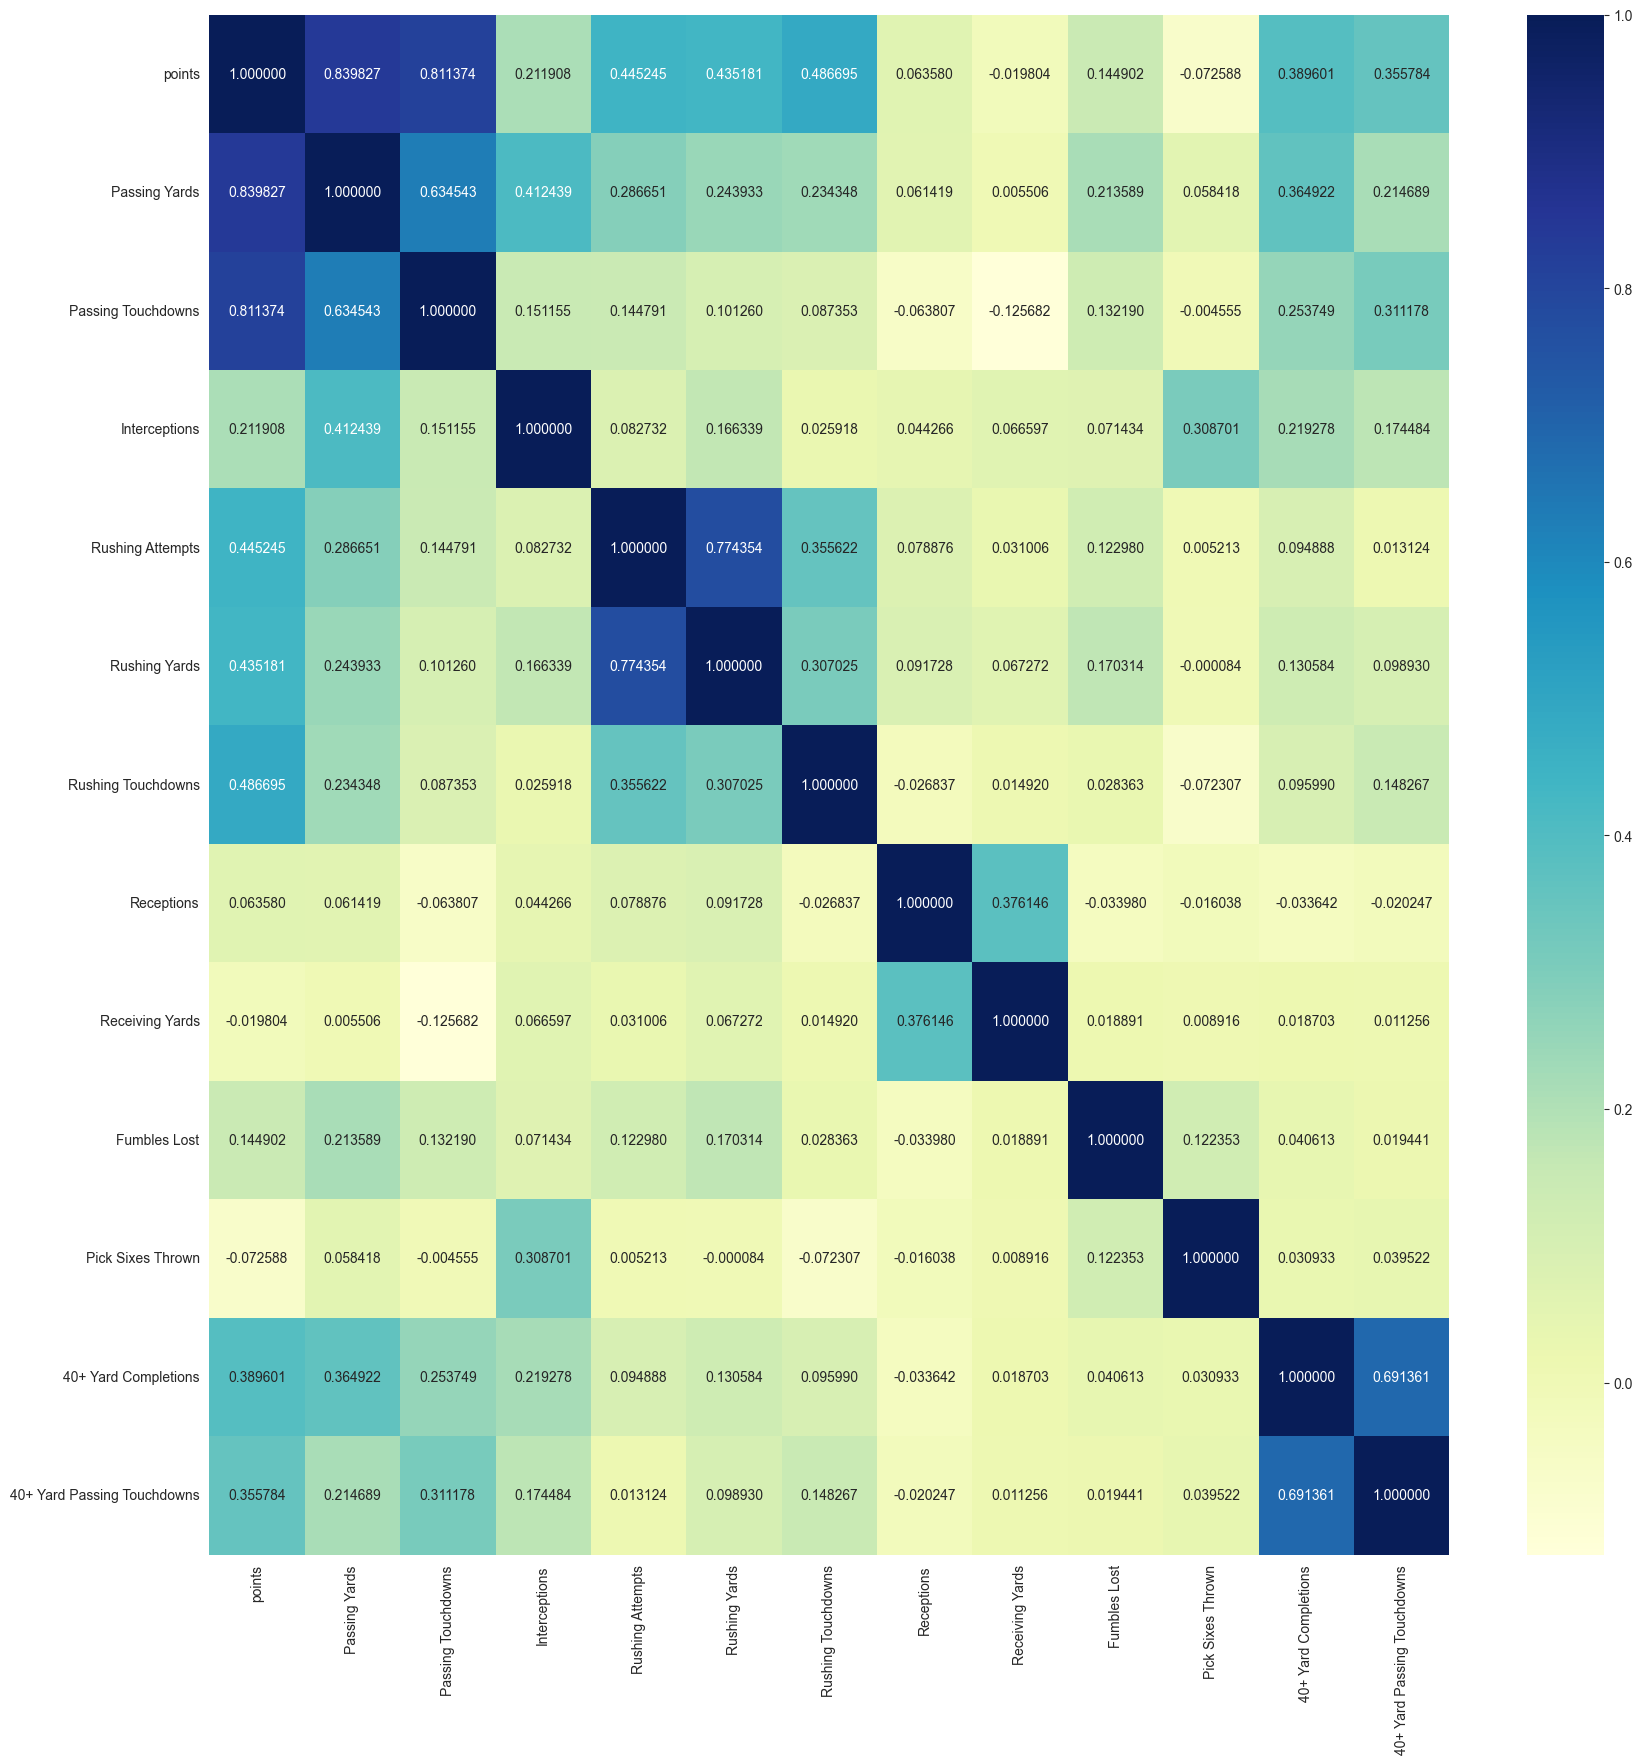

In [92]:
df = df.drop(['40+ Yard Run','40+ Yard Rushing Touchdowns'], axis=1)

plt.figure(figsize=(20, 20))
p1 = seaborn.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt="f")
plt.show()

## Feature Engineering


In [93]:
#result.to_csv('../tmp/01/player_stats.csv')
#fpts_df = pd.read_csv('../tmp/01/player_points.csv')
player_stats = pd.read_csv('../tmp/01/player_stats.csv', index_col=0)

average_score = player_stats.loc[player_stats['name'] == 'Jarrett Stidham', 'qb_rating'].mean()
#print(average_score)
fpts_df = pd.read_csv('../tmp/01/player_points.csv')
#player_stats

filterd_players = player_stats[player_stats['name'].isin(fpts_df['name'])]
#passing_yards, passing_touchdowns, interceptions, rushing_attempts, rushing_yards, rushing_tds, pick_6_thrown, 40+ yard completion, 40+yard passing_touchdowns

#average_fumbles = filterd_players.groupby('name')['fumbles'].mean().reset_index()
#average_fumbles_lost = filterd_players.groupby('name')['fumbles_lost'].mean().reset_index()


# Loop
#features = pd.merge(average_fumbles, average_fumbles_lost, on='name', how='inner')
#features
#average_fumbles

# TODO: pull out age, weight, height, experience and dont average
non_average_features = filterd_players[['name', 'weight', 'height','age', 'season_id']]
non_average_features = non_average_features[non_average_features['season_id'] == 2024]
non_average_features = non_average_features.groupby('name').mean().reset_index()
non_average_features = non_average_features.drop(['season_id'], axis=1)

filterd_players = filterd_players.drop(['active', 'status', 'position','team','player_id','season_id_x', 'season_id_y','season_id', 'weight','height','age','height'], axis=1)



filterd_players = filterd_players.groupby('name').mean().reset_index()
filterd_players

features_df = pd.merge(non_average_features, filterd_players, on='name', how='inner')
#features_df = pd.merge(features_df,)
#features_df
fpts_df = fpts_df[['name','points']]


result = pd.merge(features_df, fpts_df, on='name', how='inner')
result.to_csv('../tmp/02/player_stats_points.csv', index=False)
result
#points
#non_average_features
# add points from other data set

,name,weight,height,age,experience,fumbles,fumbles_lost,fumbles_forced,fumbles_recovered,fumbles_recovered_yards,...,total_touchdowns_y,total_yards_y,total_yards_from_scrimmage_y,two_point_rush_convs,two_pt_rush,two_pt_rush_attempts,yards_from_scrimmage_per_game_y,yards_per_game_y,yards_per_rush_attempt,points
0,Andy Dalton,220.0,74.0,37.0,14.0,3.714286,1.928571,0.0,0.0,0.0,...,19.714286,2930.071429,108.714286,0.0,0.0,0.0,8.296999,224.124632,0.0,27.56
1,Andy Dalton,220.0,74.0,37.0,14.0,3.714286,1.928571,0.0,0.0,0.0,...,19.714286,2930.071429,108.714286,0.0,0.0,0.0,8.296999,224.124632,0.0,18.70
2,Andy Dalton,220.0,74.0,37.0,14.0,3.714286,1.928571,0.0,0.0,0.0,...,19.714286,2930.071429,108.714286,0.0,0.0,0.0,8.296999,224.124632,0.0,4.74
3,Andy Dalton,220.0,74.0,37.0,14.0,3.714286,1.928571,0.0,0.0,0.0,...,19.714286,2930.071429,108.714286,0.0,0.0,0.0,8.296999,224.124632,0.0,18.94
4,Andy Dalton,220.0,74.0,37.0,14.0,3.714286,1.928571,0.0,0.0,0.0,...,19.714286,2930.071429,108.714286,0.0,0.0,0.0,8.296999,224.124632,0.0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Will Levis,229.0,76.0,25.0,2.0,5.000000,3.500000,0.0,0.5,0.0,...,7.000000,1335.000000,81.500000,0.0,0.0,0.0,13.766667,184.111115,0.0,8.68
141,Will Levis,229.0,76.0,25.0,2.0,5.000000,3.500000,0.0,0.5,0.0,...,7.000000,1335.000000,81.500000,0.0,0.0,0.0,13.766667,184.111115,0.0,16.48
142,Will Levis,229.0,76.0,25.0,2.0,5.000000,3.500000,0.0,0.5,0.0,...,7.000000,1335.000000,81.500000,0.0,0.0,0.0,13.766667,184.111115,0.0,16.60
143,Will Levis,229.0,76.0,25.0,2.0,5.000000,3.500000,0.0,0.5,0.0,...,7.000000,1335.000000,81.500000,0.0,0.0,0.0,13.766667,184.111115,0.0,0.50
